In [173]:
%reload_ext autoreload
%autoreload 2
%pylab inline
import ktwo24.mnest.ttvfast_npar9 as mod
rc('savefig',dpi=160)
import pandas as pd
import corner
from ktwo24.config import M_earth
import ktwo19.plotting
import ktwo19.io
ephem0 = ktwo19.io.load_ephem().copy()
times0 = ktwo19.io.load_times()
times0 = times0.dropna(subset=['inst'])
times0 = times0[times0.inst.str.contains('K2|Spitzer|FLWO|TRAPPIST|MuSCAT')]
times0.index =times0.i_planet


Populating the interactive namespace from numpy and matplotlib


height has been deprecated.

  analysing data from analysis/mnest-chains/ttvfast-npar9_lp=300/1-.txt
number of samples 2057
                  tstart_iso            tstop_iso       tobs_hr            tc_lo            tc_hi
i_epoch                                                                                          
150      2017-09-04 21:26:46  2017-09-05 04:49:12  7.3738326028  3168.5443665226  3168.5500678811
151      2017-09-12 19:33:33  2017-09-13 02:56:56  7.3895960608  3176.4657463518  3176.4721045210
152      2017-09-20 17:42:44  2017-09-21 01:06:38  7.3982595554  3184.3887872457  3184.3955063939
153      2017-09-28 15:47:58  2017-09-28 23:12:57  7.4166515316  3192.3090810964  3192.3165665769
154      2017-10-06 13:54:16  2017-10-06 21:20:15  7.4328602552  3200.2301311369  3200.2382919809


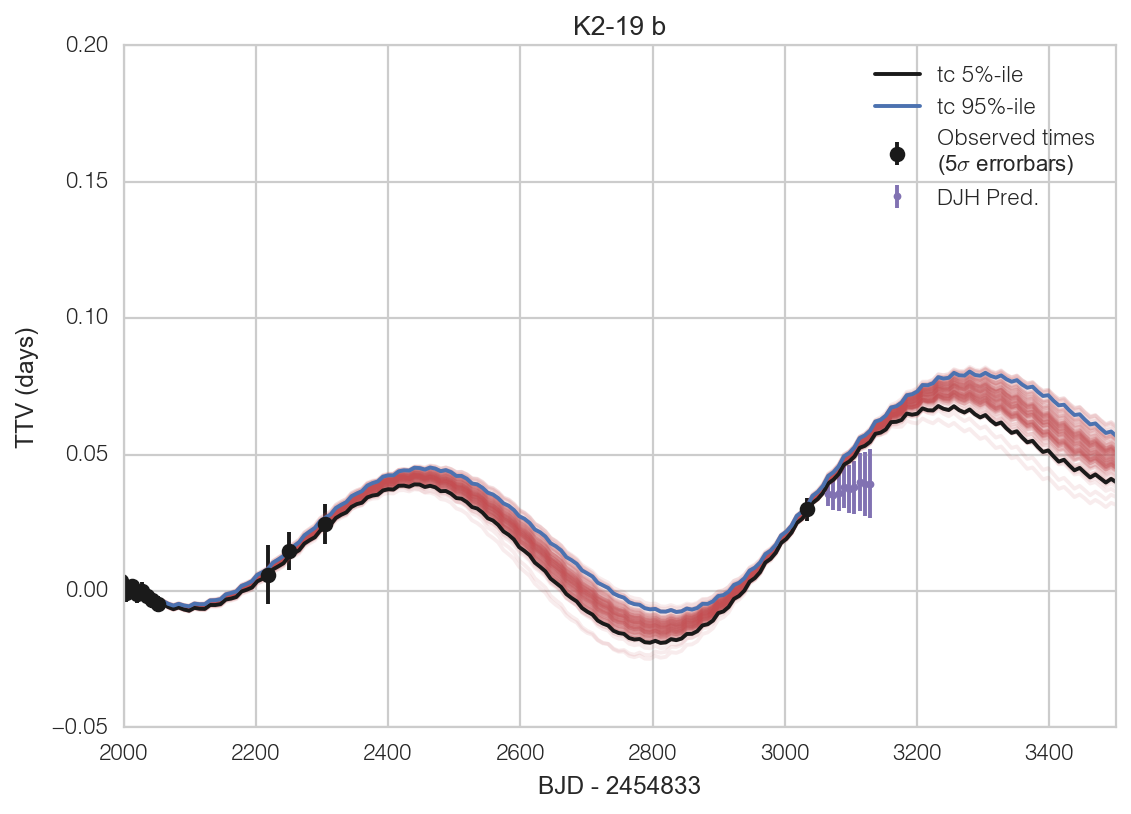

In [253]:
import ktwo19.predict
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('precision',10 )
ktwo19.predict.predict_spitzer_2017_fall(1,plot_djh=True)
title('K2-19 b')

  analysing data from analysis/mnest-chains/ttvfast-npar9_lp=300/1-.txt
number of samples 2057
                  tstart_iso            tstop_iso       tobs_hr            tc_lo            tc_hi
i_epoch                                                                                          
100      2017-09-10 07:44:13  2017-09-10 16:29:37  8.7568599861  3173.9848738302  3174.0247429963
101      2017-09-22 05:02:40  2017-09-22 13:53:09  8.8415921862  3185.8726860713  3185.9160857457
102      2017-10-04 02:28:35  2017-10-04 11:22:47  8.9034370644  3197.7656890216  3197.8116655660


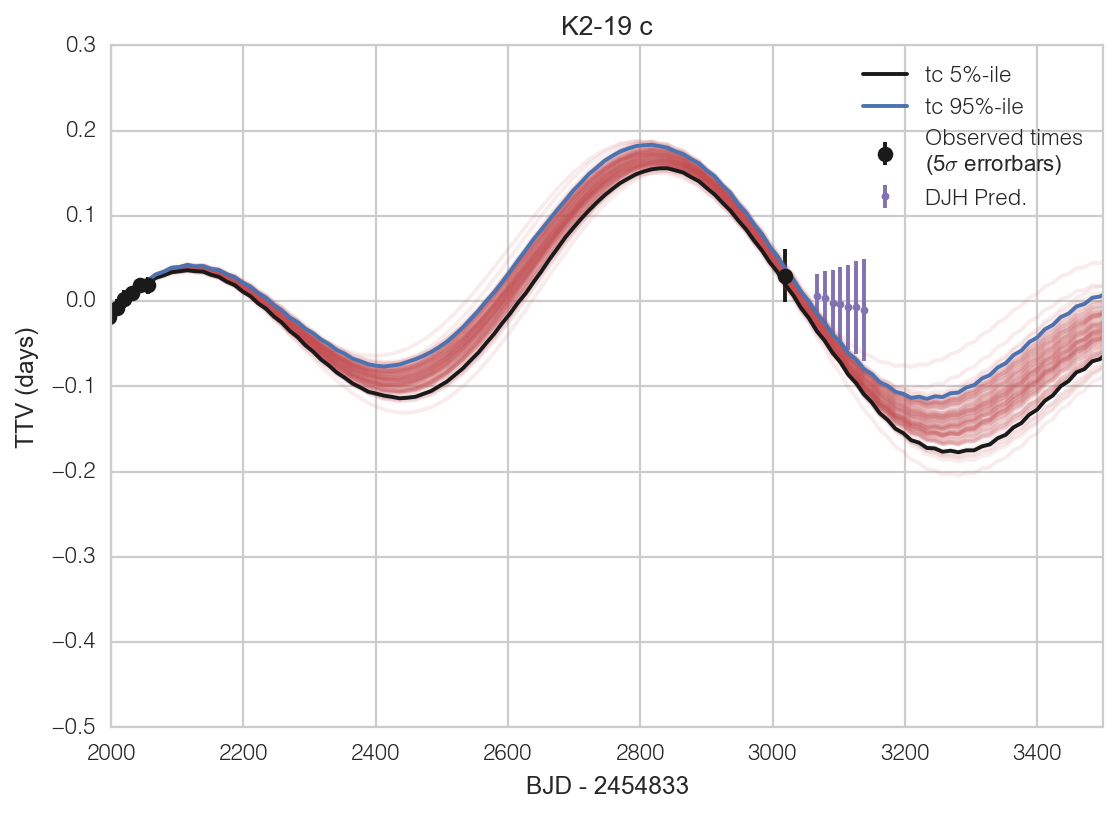

In [254]:
ktwo19.predict.predict_spitzer_2017_fall(2,plot_djh=True)
title('K2-19 c')

  analysing data from analysis/mnest-chains/ttvfast-npar9_lp=300/1-.txt
number of samples 2057
  analysing data from analysis/mnest-chains/ttvfast-npar9_lp=300/1-.txt
number of samples 2057


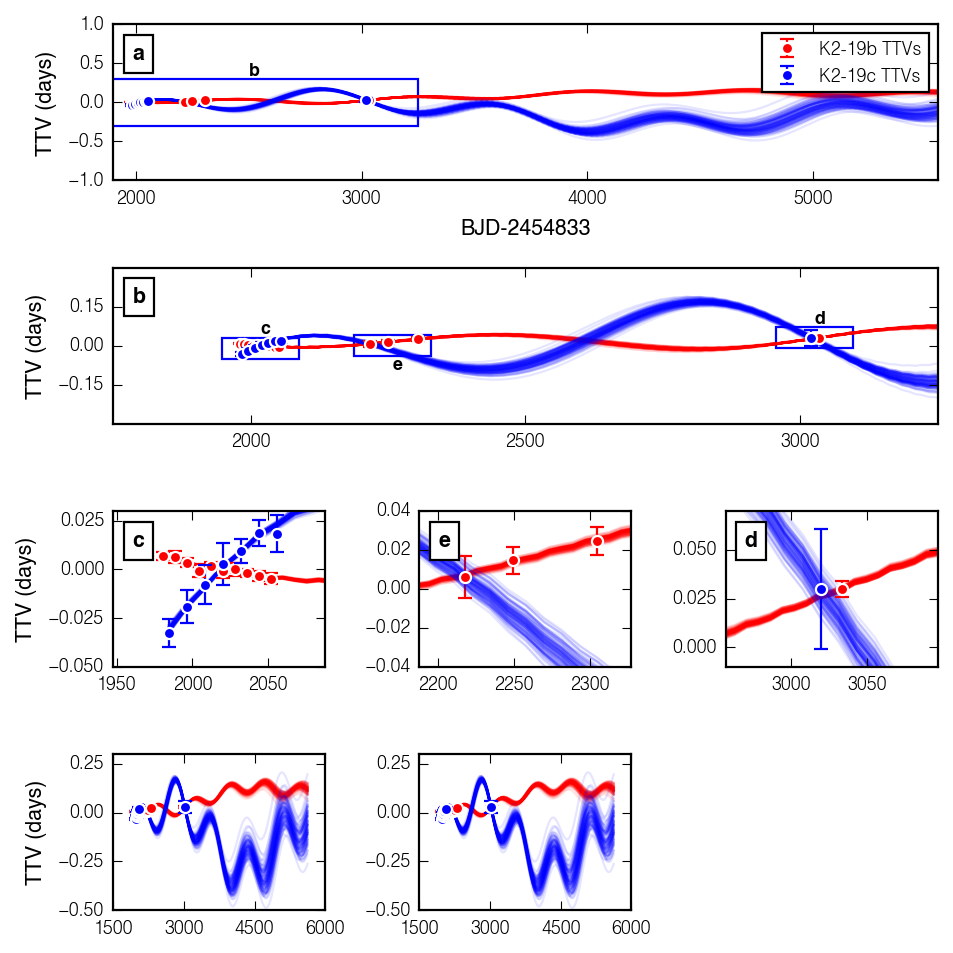

In [24]:
ktwo19.plotting.ttv_samples_ttvfast()
#gcf().savefig('paper/fig_ttvfast-npar=11-samples-ttv.pdf')

In [258]:
samples = ktwo19.io.load_samples('ttvfast-npar9')


  analysing data from analysis/mnest-chains/ttvfast-npar9_lp=300/1-.txt
number of samples 2057


In [297]:
corner.corner?

  analysing data from analysis/mnest-chains/ttvfast-npar9-secosw/1-.txt
number of samples 646


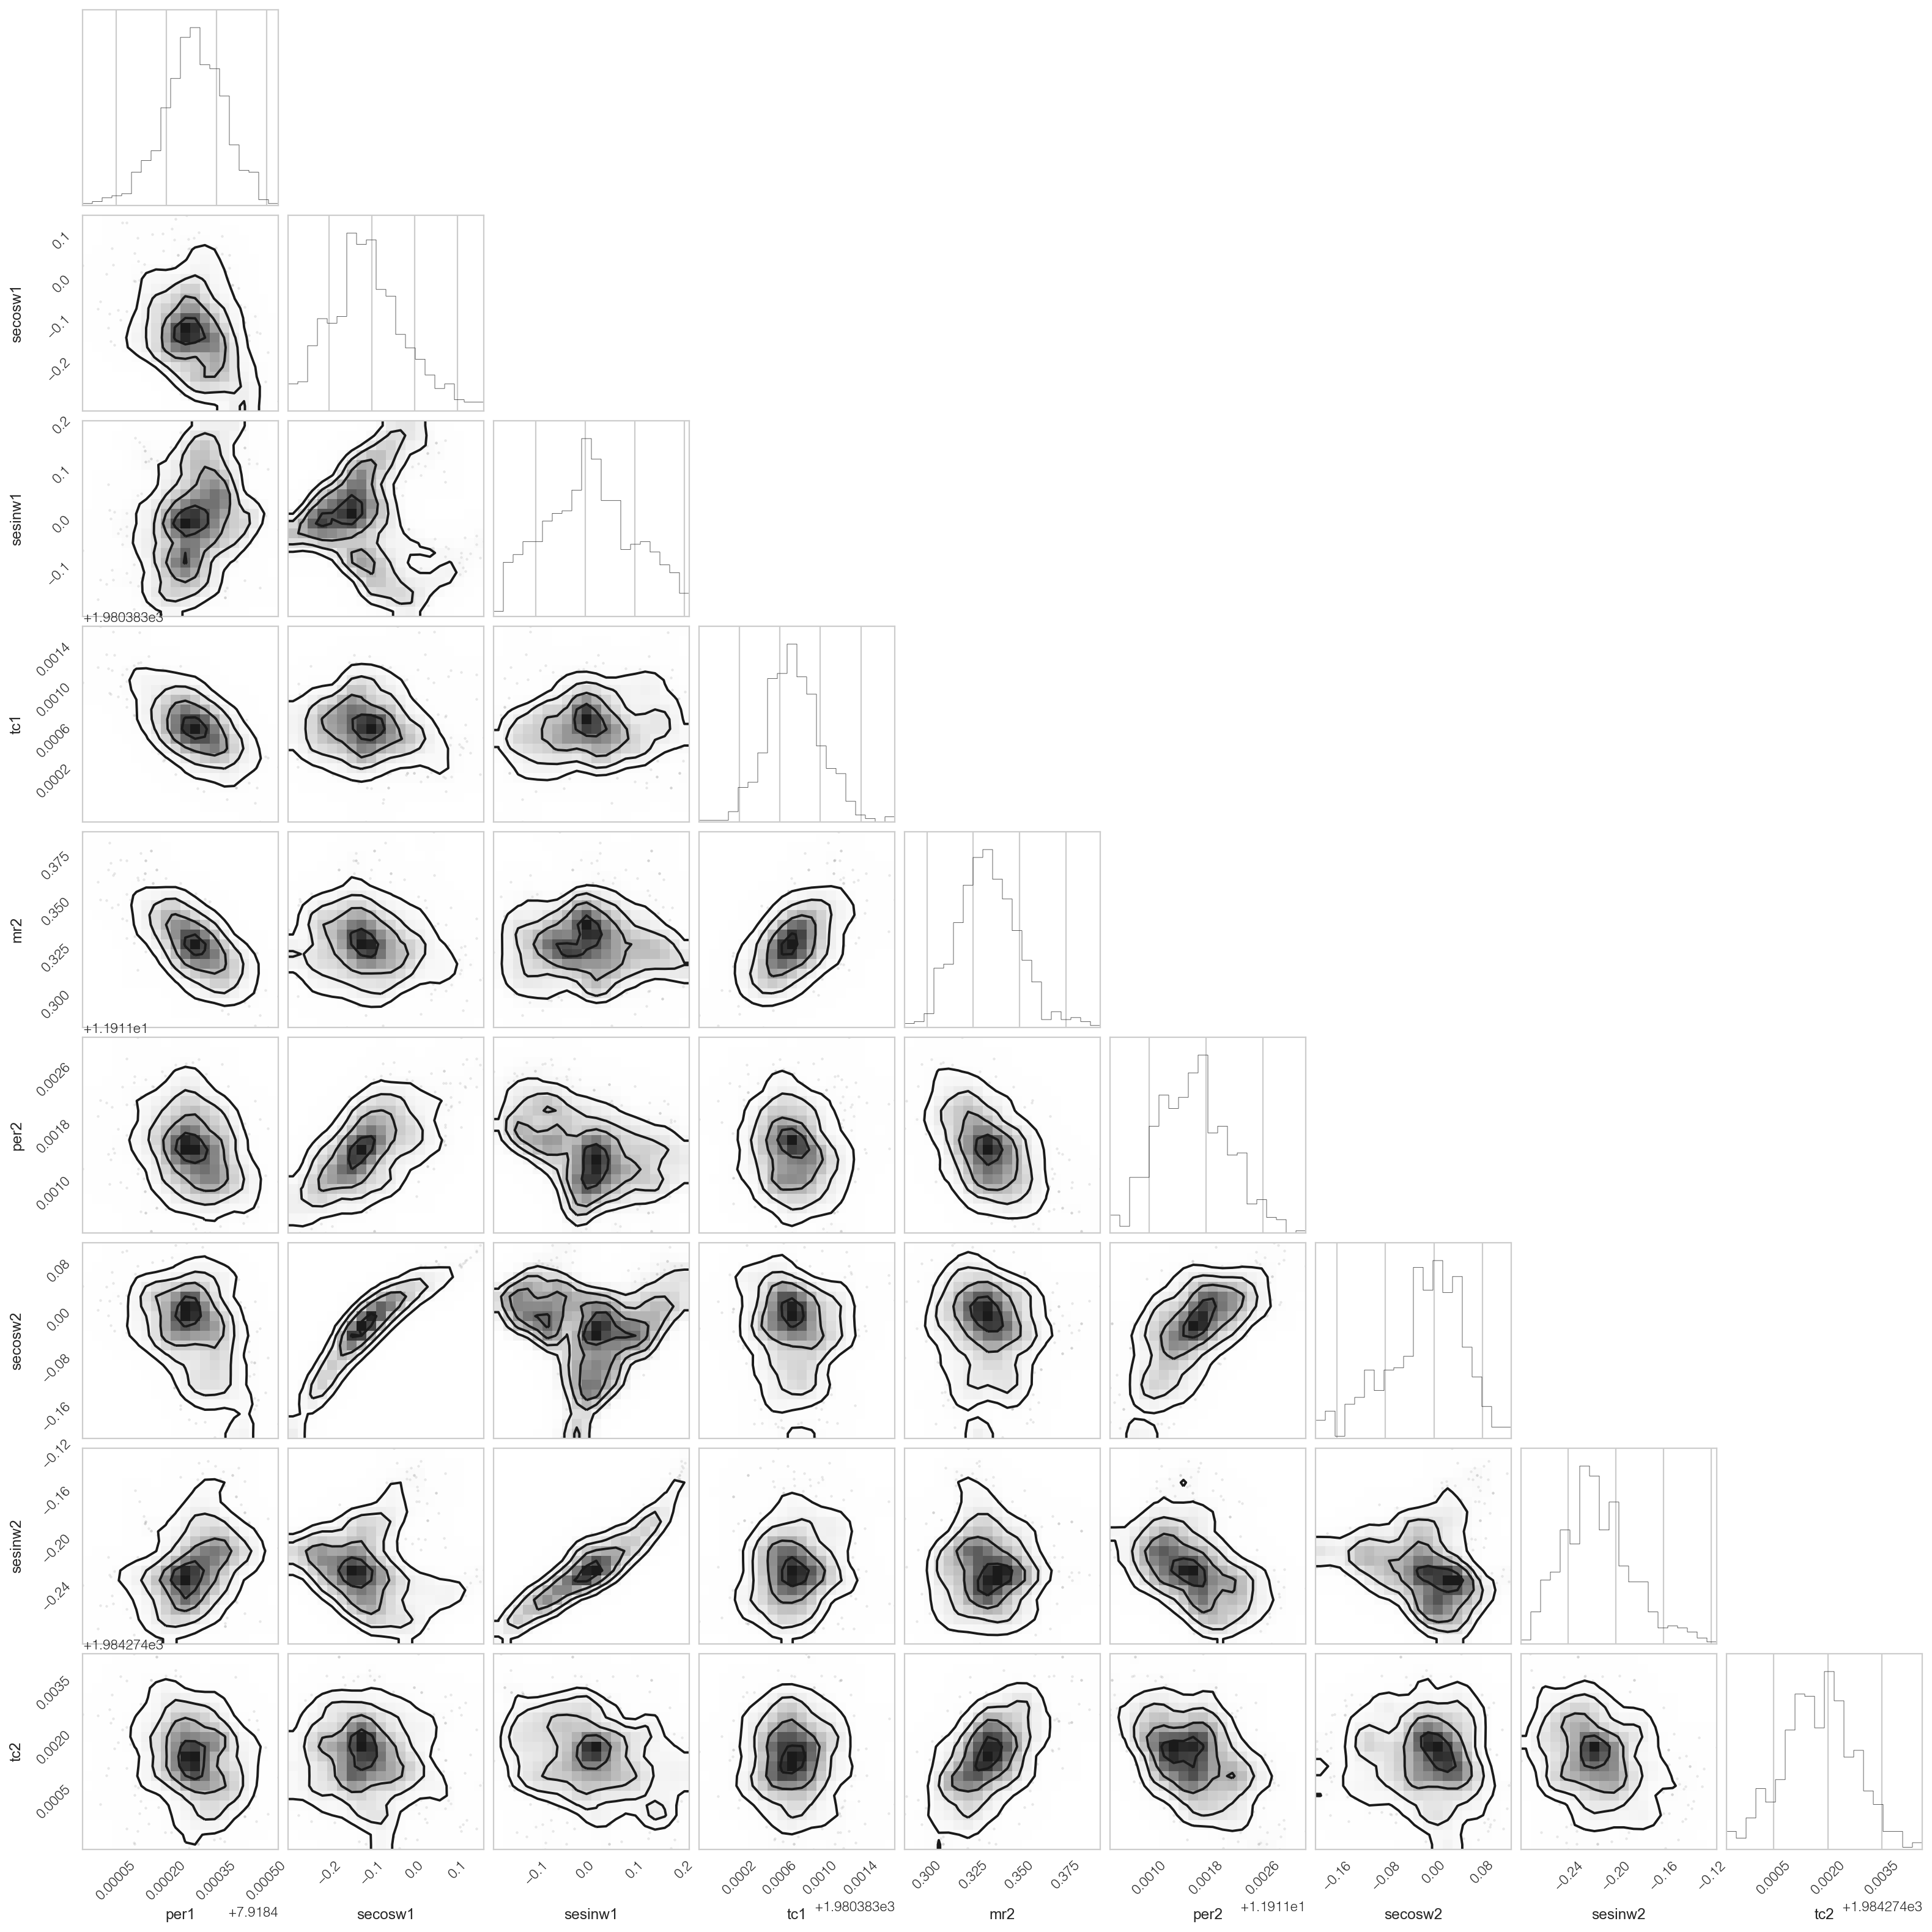

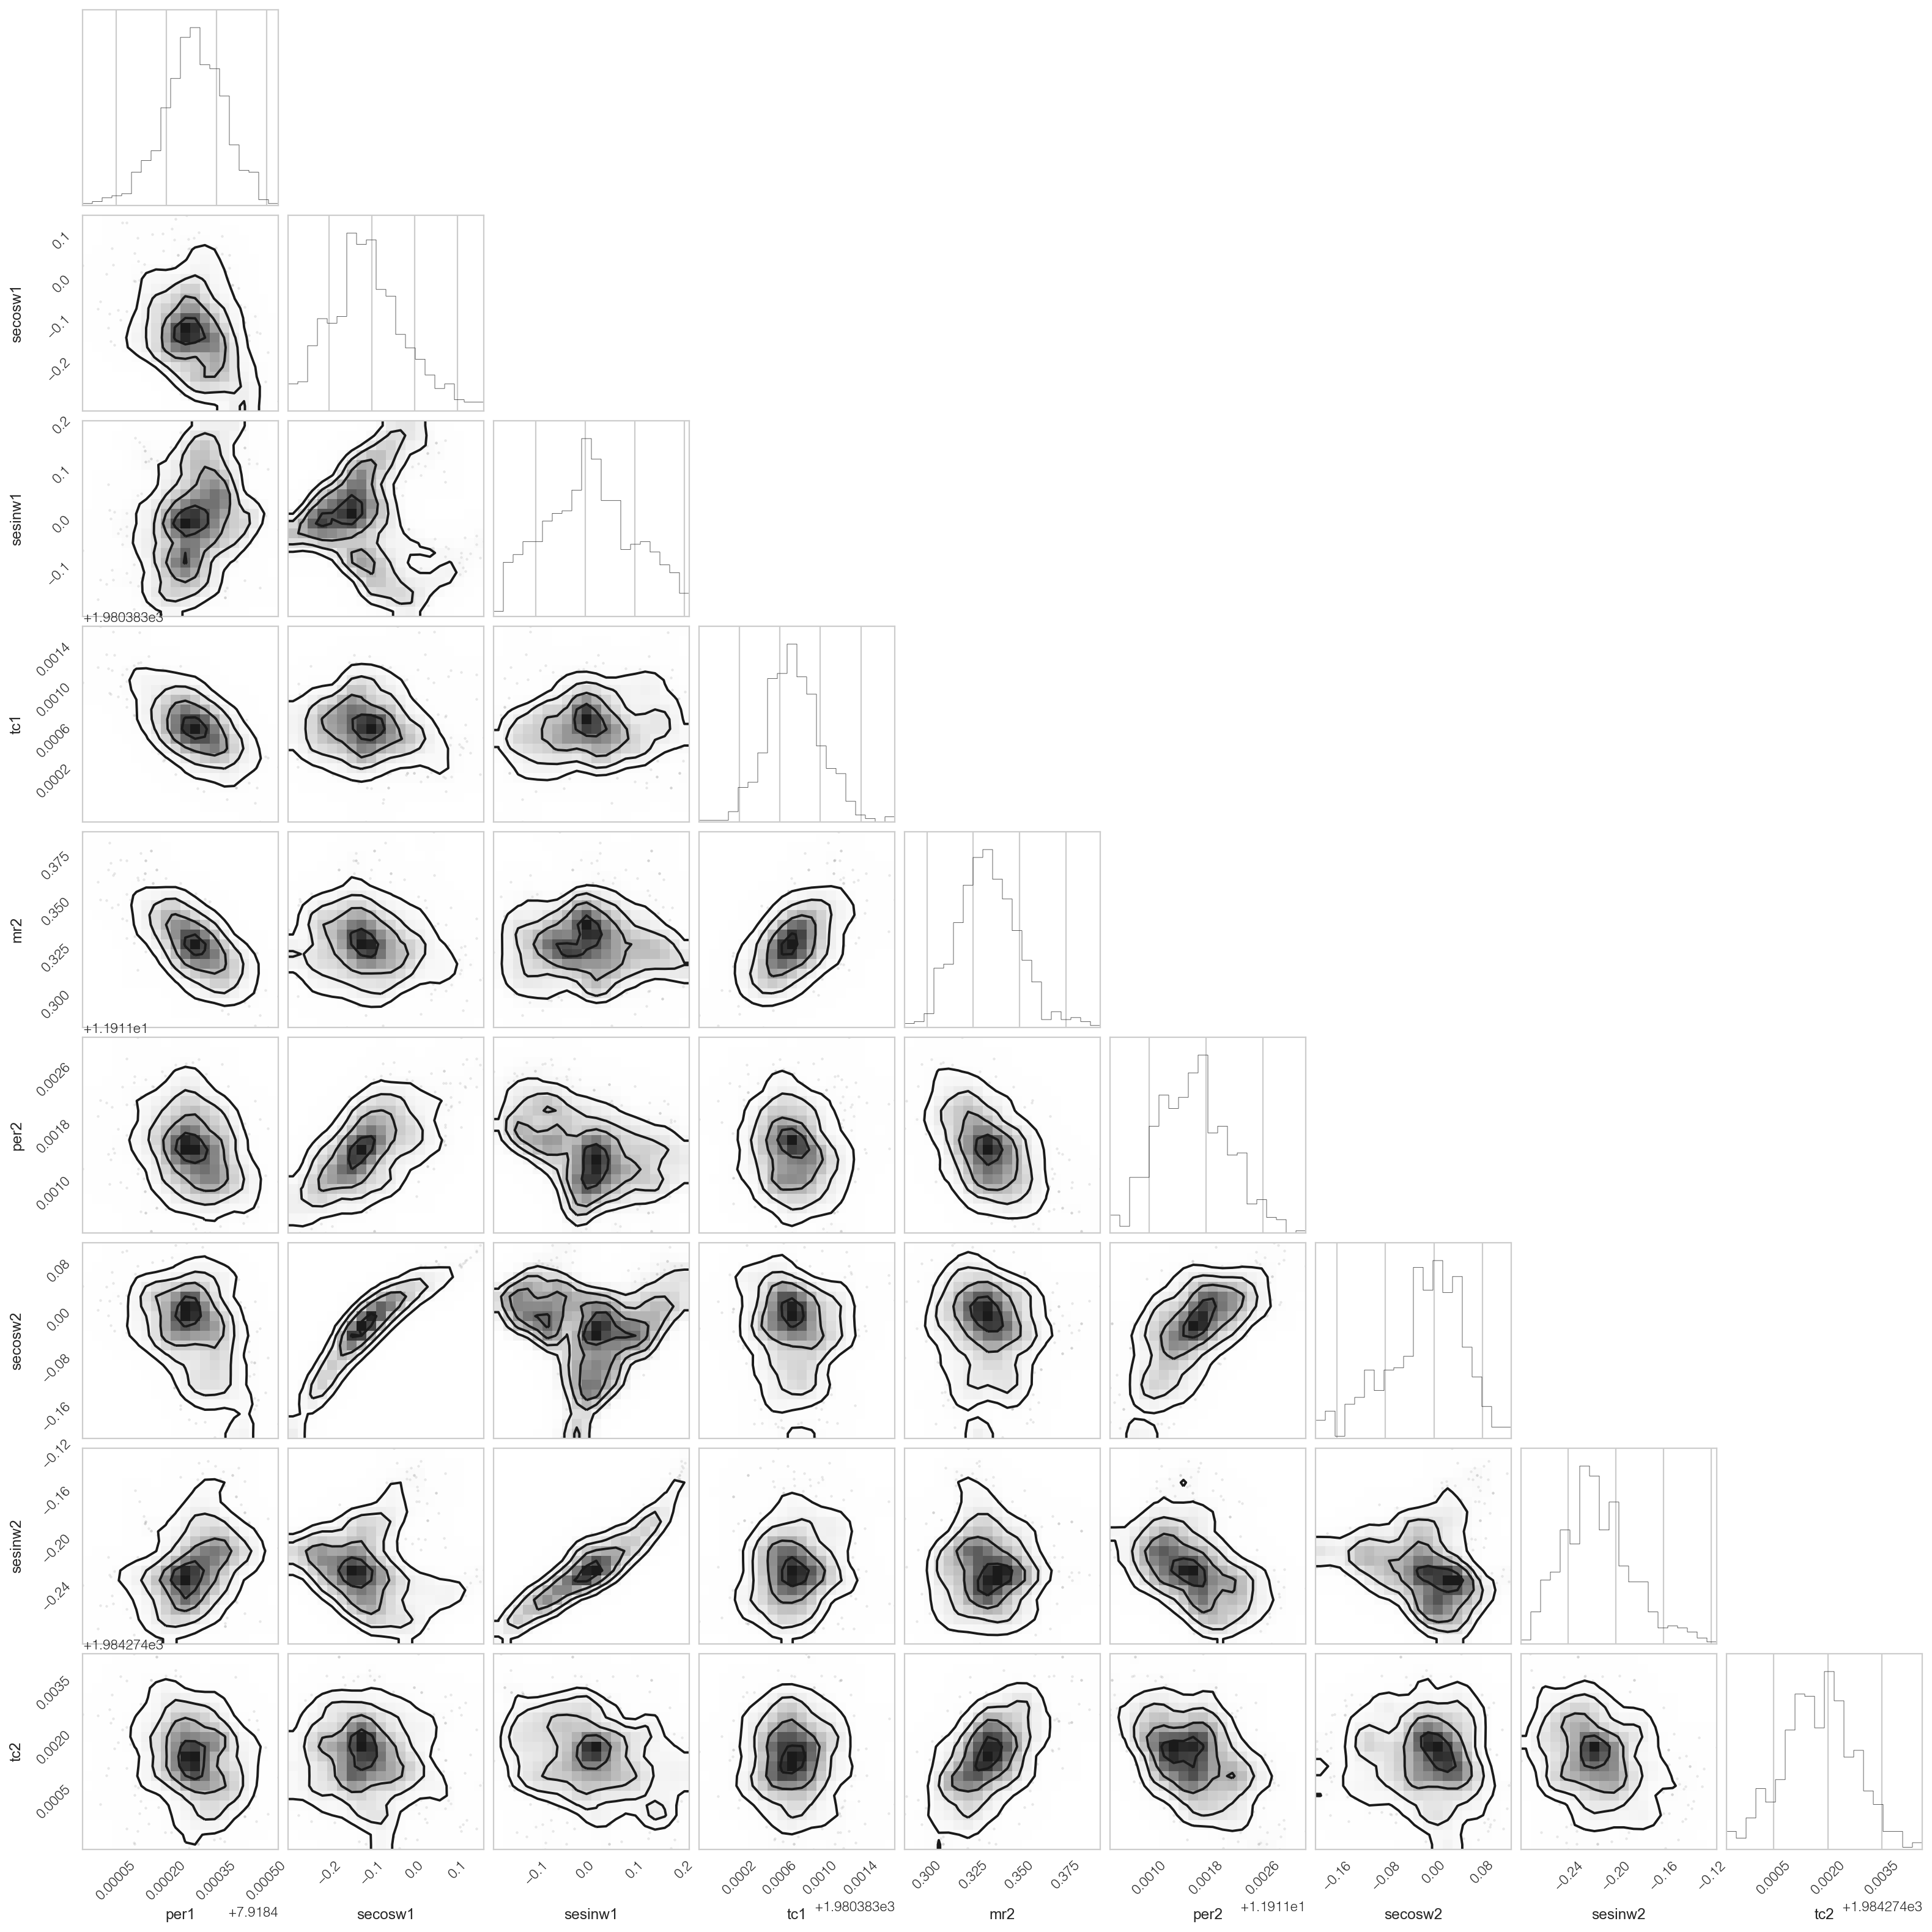

In [298]:
import corner
samples = ktwo19.io.load_samples('ttvfast-npar9-secosw')
corner.corner(samples,smooth=True)

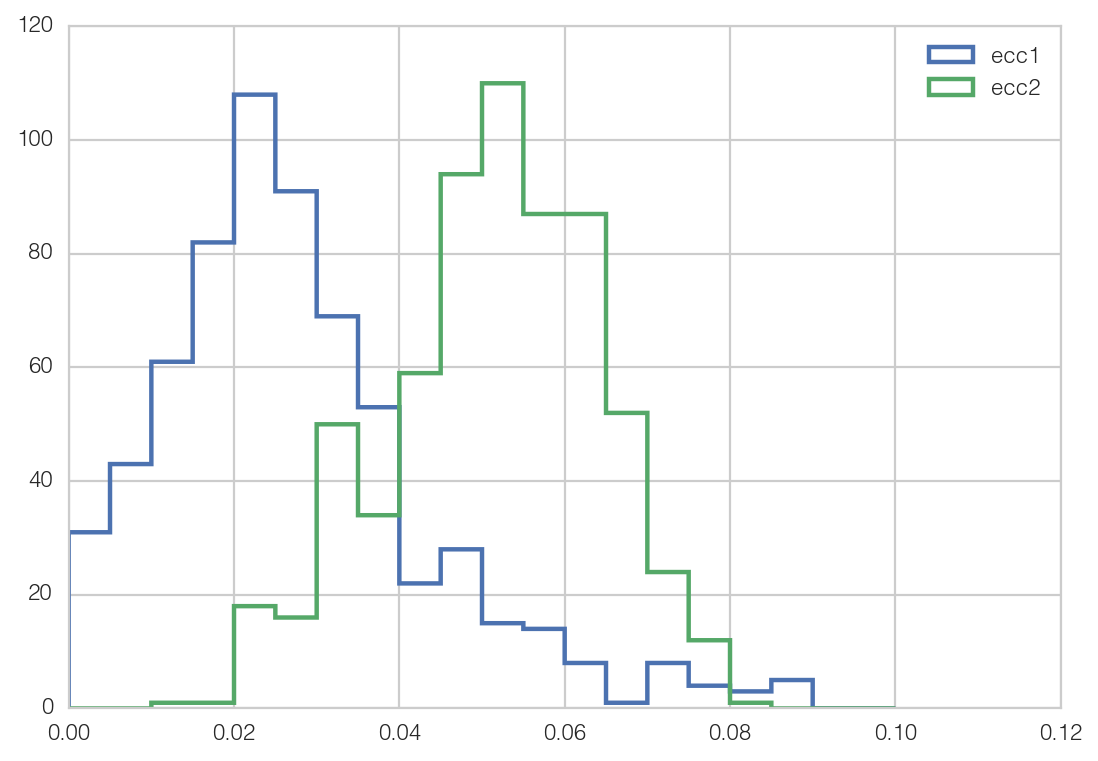

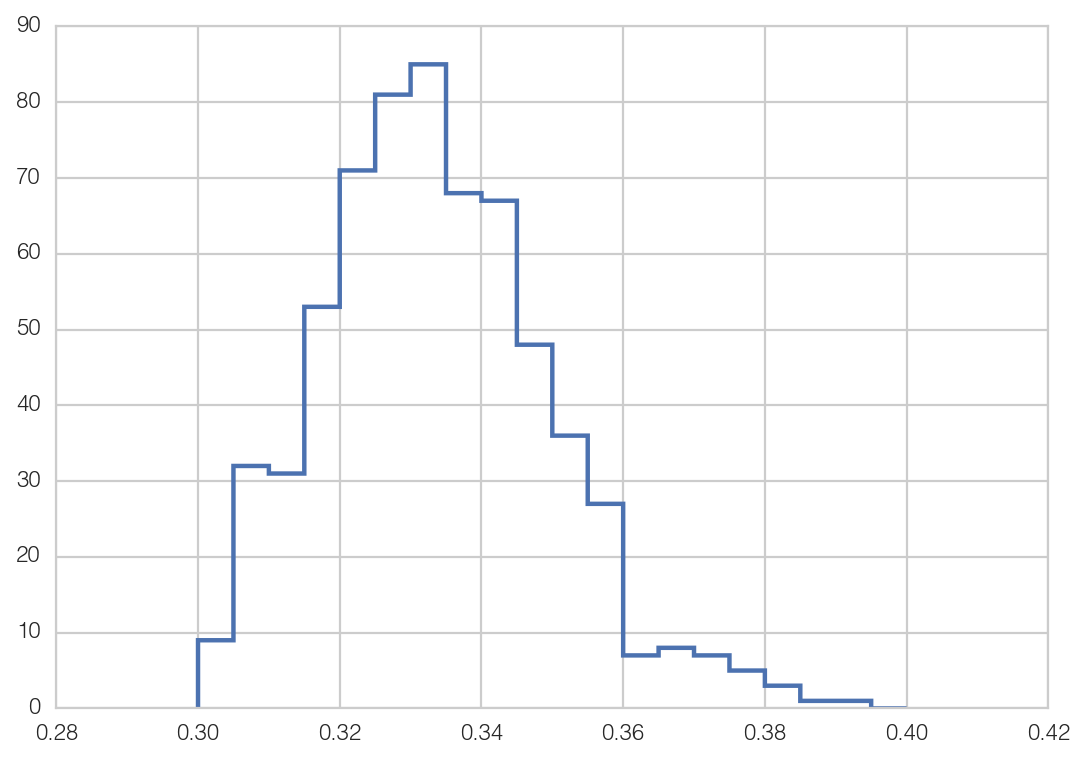

In [294]:
bins = arange(0,0.100001,0.005)
kw = dict(bins=bins,histtype='step',lw=2)

samples.eval('secosw1**2 + sesinw1**2').hist(label='ecc1',**kw)
samples.eval('secosw2**2 + sesinw2**2').hist(label='ecc2',**kw)
legend()

figure()

bins = arange(0,0.100001,0.005)
kw = dict(bins=bins,label='ecc1',histtype='step',lw=2)

bins = arange(0.3,0.4,0.005)
kw = dict(bins=bins,histtype='step',lw=2)
samples.eval('mr2').hist(**kw)


In [313]:
# if e_free > delta^2 / mu, planets may be in resonance.
ephem = ktwo19.io.load_ephem()
j = 3 
delta = ephem.ix[2,'per'] / ephem.ix[1,'per'] * (j -1) / j  -1
e_free =  0.05
mu = 30*c.M_earth / (0.9 * c.M_sun)
delta**2/mu

<Quantity 0.020785553601077162>

In [307]:
from astropy import constants as c

In [314]:
ephem

,per,T
i_planet,,
1,7.9207019469,1980.3770766406
2,11.8981919674,1984.3049563100
